In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier

from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:

df = pd.read_csv("/content/Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df['Embarked'].value_counts()

,count
Embarked,
S,270
C,102
Q,46


<Axes: xlabel='Embarked', ylabel='count'>

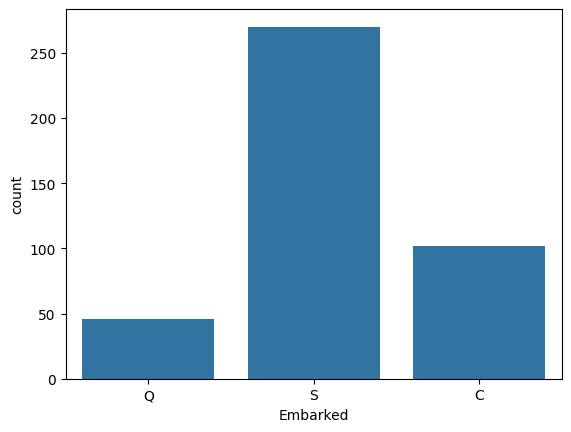

In [6]:
sns.countplot(x=df['Embarked']) # OR
# sns.countplot(y=df['Customer_Segment'])

In [7]:

df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

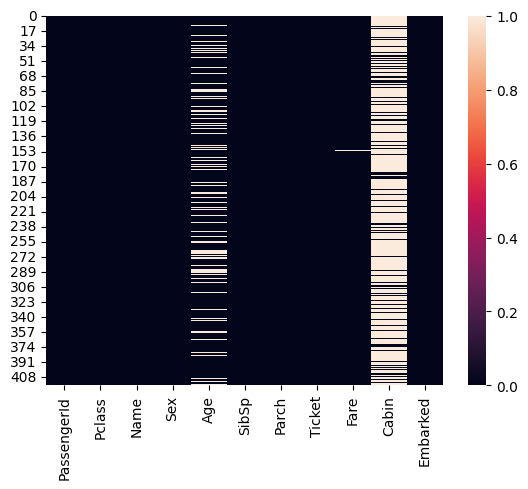

In [8]:
sns.heatmap(df.isna())# to visualise null values. There are no null values

In [10]:
column_name = 'Age'
median_value = df[column_name].median()
df[column_name].fillna(median_value, inplace=True)

<Axes: >

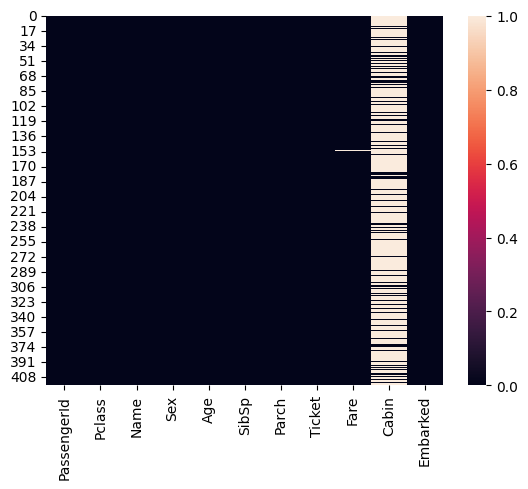

In [13]:
sns.heatmap(df.isna())# to visualise null values. There are no null values

In [21]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
x=df.iloc[:,4:7] # all rows, all columns except last column
y=df['Embarked']

In [22]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:

# Build Individual Decision Tree Model
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print('Train Accuracy: ',dt.score(xtrain,ytrain))
print('Test Accuracy: ',dt.score(xtest,ytest))

Train Accuracy:  0.8047945205479452
Test Accuracy:  0.5873015873015873


#Write User Defined Function for Model Building

In [25]:

def prediction(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
  print('Test Accuracy: ',model.score(xtest,ytest))

In [26]:
prediction(DecisionTreeClassifier())

Train Accuracy:  0.8047945205479452
Test Accuracy:  0.5793650793650794


In [27]:
prediction(GradientBoostingClassifier())
#Overfitting is there so hypertune max_depth, no.of decision trees, learning rate alpha

Train Accuracy:  0.791095890410959
Test Accuracy:  0.6111111111111112


#Hyperparameter Tuning

In [32]:
params = {
    'n_estimators' : [90,100,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.6,0.7,0.9,1], # alpha between 0 to 1
    'max_depth' : [3,5,7,11]
}

In [33]:
# tuning GradientBoostingClassifier,verbose: print possible combinations or not,
# verbose=1 will not show combinations, it will show direct results
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)
# Controls the verbosity: the higher, the more messages.
# >1 : the computation time for each fold and parameter candidate is displayed;
# >2 : the score is also displayed;
# >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

# It is GridSearchCV i.e. kfold cross validation is also done
# by default 5 folds, params: 3 X 5 X 4 = 60 combinations, 60 X 5 = 300 models

Fitting 5 folds for each of 60 candidates, totalling 300 fits


KeyboardInterrupt: 

In [34]:

grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [35]:

prediction(GradientBoostingClassifier(learning_rate=0.9,max_depth=3,n_estimators=110))

Train Accuracy:  0.8047945205479452
Test Accuracy:  0.626984126984127


In [36]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [37]:
prediction(XGBClassifier()) # some may get error.
# in target column, Customer_Segment we have class numbers as 1,2,3
#new version requires classification should start from 0. It expects class as 0,1,2

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['C' 'Q' 'S']

In [38]:

from sklearn.preprocessing import LabelEncoder

In [39]:
y

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


In [40]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [41]:
ytrain

,Embarked
118,C
271,Q
114,S
311,C
131,C
...,...
71,S
106,Q
270,C
348,S


In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)


In [44]:
ytrain

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1,
       1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0,
       2, 2, 1, 0, 2, 1])

In [45]:

prediction(XGBClassifier())

Train Accuracy:  0.8013698630136986
Test Accuracy:  0.6031746031746031


Perform Hyperparameter Tuning for XGB (learning rate, max_depth,lambda,n_estimators)

In [46]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.7,1], # alpha between 0 to 1
    'lambda': [1,2,3],
    'max_depth' : [3,7,11]
}

In [48]:
prediction(XGBClassifier(reg_lambda=2,learning_rate=0.5,max_depth=7,n_estimators=90))

Train Accuracy:  0.8013698630136986
Test Accuracy:  0.6111111111111112


#Stacking

In [50]:
# create a list of algorithms
models=[]
models.append(('lg',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))#default criterion='gini'
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))

In [51]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [52]:
prediction(StackingClassifier(estimators=models,final_estimator=RandomForestClassifier(max_depth=5)))


Train Accuracy:  0.6815068493150684
Test Accuracy:  0.6587301587301587
